#### Siamese Architecture Specified in Oreo Paper
https://towardsdatascience.com/siamese-networks-line-by-line-explanation-for-beginners-55b8be1d2fc6

research paper: 

In [1]:
import tensorflow as tf
import numpy as np
import random

# Set seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [2]:
import pandas as pd

# load the dataset
dataset = pd.read_csv('./multiclass-4190-linear-input.csv')

In [3]:
print(dataset)

       linesCount  assignmentsCount  selectionStatementsCount  \
0               0                 0                         0   
1               0                 0                         0   
2               0                 0                         0   
3               0                 0                         0   
4               0                 0                         0   
...           ...               ...                       ...   
25135          21                 2                         0   
25136           9                 1                         0   
25137           4                 2                         0   
25138           5                 1                         1   
25139          36                 1                         1   

       iterationStatementsCount  synchronizedStatementsCount  \
0                             0                            0   
1                             0                            0   
2                          

In [4]:
# split dataset into X and Y
# columns are 0-based index

# x = dataset.iloc[:, 0:28].values # 0:28 means 0th-indexed column to 27th-indexed column - wildcardTypesCount
# y = dataset.iloc[:, -1].values # -1 refers to the last column - cloneType

x = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values # -1 refers to the last column - cloneType

print(x)
print(y)

print(type(x))
print(type(y))

print(x.shape) # (25140, 48) = 25140 number of vectors in it and 48 number of scalars in each vector.
print(y.shape) # (25140,) = 25140 number of scalers. Vector. So one-dimensional data.

print(x.ndim)
print(y.ndim)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 4  2  0 ...  5  5  0]
 [ 5  1  1 ...  1  1  1]
 [36  1  1 ... 32 47  9]]
['t1' 't1' 't1' ... 't0' 't0' 't0']
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25140, 48)
(25140,)
2
1


In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, label_binarize, LabelEncoder
import numpy as np

# define One-Hot Encoding
# encoder = OneHotEncoder(sparse = False)
# transform data
# y = encoder.fit_transform(y.reshape(-1,1))

# lb = LabelBinarizer()
# lb.fit(y) # target classes are arranged in alphabetically and not in our wish. So, for a class occurance 1 will be added, others will be 0.
# print(lb.classes_) # ['mt3' 'st3' 't0' 't1' 'vst3' 'wt3']
# y = lb.transform(y) # according to classes_, 1 will be added. Example, [0 0 0 1 0 0] or 3 represents 't1' class.
# print(y)

# This function makes it possible to compute this transformation for a fixed set of class labels known ahead of time.
# label_binarize function preserves class order according to our wish!
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html#sklearn.preprocessing.label_binarize
y = label_binarize(y, classes=['t1', 'vst3', 'st3', 'mt3', 'wt3', 't0']) # Example, [0 0 0 1 0 0] or 3 represents 'mt3' class.
print(y)
print(y.shape)
print(y.ndim)

# define LabelEncoder
# le = LabelEncoder()
# le.fit(y)
# print(list(le.classes_))
# y = le.transform(y)
# print(y)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]
(25140, 6)
2


In [6]:
from tensorflow import keras
import time
from datetime import timedelta

# # Stratified K-Fold Begins!

In [ ]:
t1_recall = []
vst3_recall = []
st3_recall = []
mt3_recall = []
wt3_recall = []
t0_recall = []

def appendRecallForEachClass(arr):
    t1_recall.append(arr[0])
    vst3_recall.append(arr[1])
    st3_recall.append(arr[2])
    mt3_recall.append(arr[3])
    wt3_recall.append(arr[4])
    t0_recall.append(arr[5])
    # printRecallForEachClass(arr)

def printRecallForEachClass(arr):
    print(arr)
    print(t1_recall)
    print(vst3_recall)
    print(st3_recall)
    print(mt3_recall)
    print(wt3_recall)
    print(t0_recall)

In [ ]:
t1_precision = []
vst3_precision = []
st3_precision = []
mt3_precision = []
wt3_precision = []
t0_precision = []

def appendPrecisionForEachClass(arr):
    t1_precision.append(arr[0])
    vst3_precision.append(arr[1])
    st3_precision.append(arr[2])
    mt3_precision.append(arr[3])
    wt3_precision.append(arr[4])
    t0_precision.append(arr[5])
    # printPrecisionForEachClass(arr)

def printPrecisionForEachClass(arr):
    print(arr)
    print(t1_precision)
    print(vst3_precision)
    print(st3_precision)
    print(mt3_precision)
    print(wt3_precision)
    print(t0_precision)

In [ ]:
t1_f1score = []
vst3_f1score = []
st3_f1score = []
mt3_f1score = []
wt3_f1score = []
t0_f1score = []

def appendF1ScoreForEachClass(arr):
    t1_f1score.append(arr[0])
    vst3_f1score.append(arr[1])
    st3_f1score.append(arr[2])
    mt3_f1score.append(arr[3])
    wt3_f1score.append(arr[4])
    t0_f1score.append(arr[5])
    # printF1ScoreForEachClass(arr)

def printF1ScoreForEachClass(arr):
    print(arr)
    print(t1_f1score)
    print(vst3_f1score)
    print(st3_f1score)
    print(mt3_f1score)
    print(wt3_f1score)
    print(t0_f1score)

In [ ]:
# function that creates and returns the subnetwork
def create_subnetwork(input_shape, initializer):
    input = keras.Input(shape = input_shape, name = 'subnetwork_input')
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(input)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(x)
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(x)
    return keras.Model(name = 'subnetwork', inputs = input, outputs = x)

In [ ]:
# function that creates and returns the comparatornetwork
def create_comparatornetwork(input_vect_dim, initializer):
    input = keras.Input(shape = (input_vect_dim,), name = 'comparatornetwork_input')
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(input)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(units = 100, kernel_initializer = initializer, activation = 'relu')(x)
    x = keras.layers.Dense(units = 50, kernel_initializer = initializer, activation = 'relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(units = 25, kernel_initializer = initializer, activation = 'relu')(x)
    return keras.Model(name = 'comparatornetwork', inputs = input, outputs = x)

In [ ]:
# in Input object, shape = (24,) indicates that the expected input will be batches of 24-dimensional vectors.
input_shape = (48,)
print(input_shape)

In [ ]:
# defining 'HeNormal' initializer
initializer = tensorflow.keras.initializers.HeNormal()
print(initializer)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

bSize = 32
eSize = 500

accuracy = []
recall_macro = [] # macro and weighted results will be the same as we have balance among labels!
recall_micro = []
recall_weighted = []
precision_macro = []
precision_micro = []
precision_weighted = []
f1_macro = []
f1_micro = []
f1_weighted = []

fold = 0

# start timer
start_time = time.time()

# For further references - https://www.youtube.com/watch?v=maiQf8ray_s&t=806s
# to maintain a balance between x and y, we need to pass in y - 'cloneType' as the second argument
# for y, we need to pass "original class", not the dummy variables.
for train, test in skf.split(x, dataset['cloneType']):
    fold = fold + 1
    print(f"Fold: {fold}")
    print(f"Batch Size: {bSize}")
    print(f"Epochs: {eSize}")
    print(f"Train: {train}")
    print(f"Test: {test}")

    x_train = x[train]
    y_train = y[train]
    
    x_test = x[test]
    y_test = y[test]
    
    print(f"x_train size: {len(x_train)}")
    print(f"y_train size: {len(y_train)}")
    print(f"x_test size: {len(x_test)}")
    print(f"y_test size: {len(y_test)}")
    
    # Building Siamese Network With Two Identical Subnetworks
    left_input = keras.Input(shape = input_shape, name = 'left_input')
    right_input = keras.Input(shape = input_shape, name = 'right_input')

    subnetwork = create_subnetwork(input_shape, initializer)

    encoded_left = subnetwork(left_input) # chain layers
    encoded_right = subnetwork(right_input)

    # concatenate outputs of the two subnetworks
    concatted = keras.layers.Concatenate()([encoded_left, encoded_right])
    print(concatted.shape)

    comparatornetwork = create_comparatornetwork(concatted.shape[1], initializer)

    comparator = comparatornetwork(concatted)

    classificationUnit = keras.layers.Dense(name = 'classificationUnit', units = y.shape[1], kernel_initializer = initializer, activation = 'softmax')(comparator)

    siamese_net = keras.Model(name = 'siameseNetwork', inputs = [left_input, right_input], outputs = classificationUnit)

    siamese_net.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

    siamese_net.summary()
    
    print(f"x_train shape: {x_train.shape}")
    print(f"y_train shape: {y_train.shape}")

    # https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/indexing-slicing-numpy-arrays/

    x_train_left_input = x_train[:, 0:48] # select all rows and columns from 0th indexed to 47th indexed columns
    x_train_right_input = x_train[:, 48:96]

    print(f"x_train_left_input shape: {x_train_left_input.shape}")
    print(f"x_train_right_input shape: {x_train_right_input.shape}")
    
    siamese_net.fit(x = [x_train_left_input, x_train_right_input], y = y_train, batch_size = bSize, epochs = eSize)
    
    print(f"x_test shape: {x_test.shape}")
    print(f"y_test shape: {y_test.shape}")

    x_test_left_input = x_test[:, 0:48] # select all rows and columns from 0th indexed to 47th indexed columns
    x_test_right_input = x_test[:, 48:96]

    print(f"x_test_left_input shape: {x_test_left_input.shape}")
    print(f"x_test_right_input shape: {x_test_right_input.shape}")
    
    y_pred = siamese_net.predict(x = [x_test_left_input, x_test_right_input])
    
    y_pred = np.argmax(y_pred, axis = -1)
    print(f"y_pred: {y_pred}")

    y_test = np.argmax(y_test, axis = -1)
    print(f"y_test: {y_test}")

    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}'s Accuracy Score {acc}")
    accuracy.append(acc)

    # recall

    # recall macro average - This parameter is required for multiclass/multilabel targets.
    recallmacro = recall_score(y_test, y_pred, average='macro')
    print(f"Fold {fold}'s Recall Macro Score {recallmacro}")
    recall_macro.append(recallmacro)

    # recall micro average - This parameter is required for multiclass/multilabel targets.
    recallmicro = recall_score(y_test, y_pred, average='micro')
    print(f"Fold {fold}'s Recall Micro Score {recallmicro}")
    recall_micro.append(recallmicro)

    # recall weighted average - This parameter is required for multiclass/multilabel targets.
    recallweighted = recall_score(y_test, y_pred, average='weighted')
    print(f"Fold {fold}'s Recall Weighted Score {recallweighted}")
    recall_weighted.append(recallweighted)

    # precision

    # precision macro average - This parameter is required for multiclass/multilabel targets.
    precisionmacro = precision_score(y_test, y_pred, average='macro')
    print(f"Fold {fold}'s Precision Macro Score {precisionmacro}")
    precision_macro.append(precisionmacro)

    # precision micro average - This parameter is required for multiclass/multilabel targets.
    precisionmicro = precision_score(y_test, y_pred, average='micro')
    print(f"Fold {fold}'s Precision Micro Score {precisionmicro}")
    precision_micro.append(precisionmicro)

    # precision weighted average - This parameter is required for multiclass/multilabel targets.
    precisionweighted = precision_score(y_test, y_pred, average='weighted')
    print(f"Fold {fold}'s Precision Weighted Score {precisionweighted}")
    precision_weighted.append(precisionweighted)

    # f1 score

    # f1 macro average - This parameter is required for multiclass/multilabel targets.
    f1macro = f1_score(y_test, y_pred, average='macro')
    print(f"Fold {fold}'s F1 Macro Score {f1macro}")
    f1_macro.append(f1macro)

    # f1 micro average - This parameter is required for multiclass/multilabel targets.
    f1micro = f1_score(y_test, y_pred, average='micro')
    print(f"Fold {fold}'s F1 Micro Score {f1micro}")
    f1_micro.append(f1micro)

    # f1 weighted average - This parameter is required for multiclass/multilabel targets.
    f1weighted = f1_score(y_test, y_pred, average='weighted')
    print(f"Fold {fold}'s F1 Weighted Score {f1weighted}")
    f1_weighted.append(f1weighted)

    # collect details class-vice
    appendRecallForEachClass(recall_score(y_test, y_pred, average=None))
    appendPrecisionForEachClass(precision_score(y_test, y_pred, average=None))
    appendF1ScoreForEachClass(f1_score(y_test, y_pred, average=None))
    
# Stop timer clock
elapsed = time.time() - start_time

In [ ]:
print(elapsed)

# Calculate K-fold execution duration
print("K-fold execution duration: " + str(timedelta(seconds=elapsed)))

In [ ]:
# Overall K-fold's accuracy
from statistics import mean

print(f"Testing accuracy array: {accuracy}")
print("Final accuracy score is: {:0.2f}%".format(mean(accuracy) * 100))

In [ ]:
# Precision Macro
print(f"Testing Precision Macro array: {precision_macro}")
print("Final Precision Macro score is: {:0.2f}%".format(mean(precision_macro) * 100))

# Precision Micro
print(f"Testing Precision Micro array: {precision_micro}")
print("Final Precision Micro score is: {:0.2f}%".format(mean(precision_micro) * 100))

# Precision Weighted
print(f"Testing Precision Weighted array: {precision_weighted}")
print("Final Precision Weighted score is: {:0.2f}%".format(mean(precision_weighted) * 100))

In [ ]:
# Recall Macro
print(f"Testing Recall Macro array: {recall_macro}")
print("Final Recall Macro score is: {:0.2f}%".format(mean(recall_macro) * 100))

# Recall Micro
print(f"Testing Recall Micro array: {recall_micro}")
print("Final Recall Micro score is: {:0.2f}%".format(mean(recall_micro) * 100))

# Recall Weighted
print(f"Testing Recall Weighted array: {recall_weighted}")
print("Final Recall Weighted score is: {:0.2f}%".format(mean(recall_weighted) * 100))

In [ ]:
# F1 Macro
print(f"Testing F1 Macro array: {f1_macro}")
print("Final F1 Macro score is: {:0.2f}%".format(mean(f1_macro) * 100))

# F1 Micro
print(f"Testing F1 Micro array: {f1_micro}")
print("Final F1 Micro score is: {:0.2f}%".format(mean(f1_micro) * 100))

# F1 Weighted
print(f"Testing F1 Weighted array: {f1_weighted}")
print("Final F1 Weighted score is: {:0.2f}%".format(mean(f1_weighted) * 100))

In [ ]:
# Recall by Class
print(len(t1_recall))
print("Type 1 Recall: {:0.2f}%".format(mean(t1_recall) * 100))
print("VST3 Recall: {:0.2f}%".format(mean(vst3_recall) * 100))
print("ST3 Recall: {:0.2f}%".format(mean(st3_recall) * 100))
print("MT3 Recall: {:0.2f}%".format(mean(mt3_recall) * 100))
print("WT3/4 Recall: {:0.2f}%".format(mean(wt3_recall) * 100))
print("False Recall: {:0.2f}%".format(mean(t0_recall) * 100))

In [ ]:
# Precision by Class
print(len(wt3_precision))
print("Type 1 Precision: {:0.2f}%".format(mean(t1_precision) * 100))
print("VST3 Precision: {:0.2f}%".format(mean(vst3_precision) * 100))
print("ST3 Precision: {:0.2f}%".format(mean(st3_precision) * 100))
print("MT3 Precision: {:0.2f}%".format(mean(mt3_precision) * 100))
print("WT3/4 Precision: {:0.2f}%".format(mean(wt3_precision) * 100))
print("False Precision: {:0.2f}%".format(mean(t0_precision) * 100))

In [ ]:
# F1 Score by Class
print(len(mt3_f1score))
print("Type 1 F1 Score: {:0.2f}%".format(mean(t1_f1score) * 100))
print("VST3 F1 Score: {:0.2f}%".format(mean(vst3_f1score) * 100))
print("ST3 F1 Score: {:0.2f}%".format(mean(st3_f1score) * 100))
print("MT3 F1 Score: {:0.2f}%".format(mean(mt3_f1score) * 100))
print("WT3/4 F1 Score: {:0.2f}%".format(mean(wt3_f1score) * 100))
print("False F1 Score: {:0.2f}%".format(mean(t0_f1score) * 100))

# # Stratified K-fold Ends!

# # Train-Test Split Method Begins!

In [7]:
# Split the x and y dataset into the Training set and Test set while performing the data shuffling
# https://www.kaggle.com/questions-and-answers/189700 - don't use train-test split, we'll use CV
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)

(17598, 48)
(17598, 6)


In [8]:
# in Input object, shape = (24,) indicates that the expected input will be batches of 24-dimensional vectors.
input_shape = (48,)
print(input_shape)

(24,)


In [9]:
# function that creates and returns the subnetwork
def create_subnetwork(input_shape, initializer):
    input = keras.Input(shape = input_shape, name = 'subnetwork_input')
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(input)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(x)
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(x)
    return keras.Model(name = 'subnetwork', inputs = input, outputs = x)

In [10]:
# function that creates and returns the comparatornetwork
def create_comparatornetwork(input_vect_dim, initializer):
    input = keras.Input(shape = (input_vect_dim,), name = 'comparatornetwork_input')
    x = keras.layers.Dense(units = 200, kernel_initializer = initializer, activation = 'relu')(input)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(units = 100, kernel_initializer = initializer, activation = 'relu')(x)
    x = keras.layers.Dense(units = 50, kernel_initializer = initializer, activation = 'relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(units = 25, kernel_initializer = initializer, activation = 'relu')(x)
    return keras.Model(name = 'comparatornetwork', inputs = input, outputs = x)

In [11]:
# defining 'HeNormal' initializer
initializer = tensorflow.keras.initializers.HeNormal()
print(initializer)

In [12]:
# Building Siamese Network With Two Identical Subnetworks
left_input = keras.Input(shape = input_shape, name = 'left_input')
right_input = keras.Input(shape = input_shape, name = 'right_input')

subnetwork = create_subnetwork(input_shape, initializer)

encoded_left = subnetwork(left_input) # chain layers
encoded_right = subnetwork(right_input)

# concatenate outputs of the two subnetworks
concatted = keras.layers.Concatenate()([encoded_left, encoded_right])
print(concatted.shape)

comparatornetwork = create_comparatornetwork(concatted.shape[1], initializer)

comparator = comparatornetwork(concatted)

classificationUnit = keras.layers.Dense(name = 'classificationUnit', units = y.shape[1], kernel_initializer = initializer, activation = 'softmax')(comparator)

oreo = keras.Model(name = 'OreoNetwork', inputs = [left_input, right_input], outputs = classificationUnit)

oreo.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

oreo.summary()

(None, 400)
Model: "OreoNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 left_input (InputLayer)        [(None, 24)]         0           []                               
                                                                                                  
 right_input (InputLayer)       [(None, 24)]         0           []                               
                                                                                                  
 subnetwork (Functional)        (None, 200)          125600      ['left_input[0][0]',             
                                                                  'right_input[0][0]']            
                                                                                                  
 concatenate (Concatenate)      (None, 400)          0           ['subnetwor

In [13]:
comparatornetwork.summary()
keras.utils.plot_model(comparatornetwork, show_shapes = True, show_layer_names = True)

In [14]:
print(x_train.shape)
print(y_train.shape)

# https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/indexing-slicing-numpy-arrays/

x_train_left_input = x_train[:, 0:48] # select all rows and columns from 0th indexed to 47th indexed columns
x_train_right_input = x_train[:, 48:96]

# x_train_left_input = x_train[:, 0:28] # Existing 28 features
# x_train_right_input = x_train[:, 48:76] # Existing 28 features

# x_train_left_input = x_train[:, 28:48] # Novel 20 features
# x_train_right_input = x_train[:, 76:96] # Novel 20 features

print(x_train_left_input.shape)
print(x_train_right_input.shape)

(17598, 48)
(17598, 6)
(17598, 24)
(17598, 24)


In [15]:
import time
from datetime import timedelta

# start timer
start_time = time.time()

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('oreo_epoch_500_training.log', separator=',', append=False)

# Fit the ANN to the Training set
historyObject = oreo.fit(x = [x_train_left_input, x_train_right_input], y = y_train, batch_size = 32, epochs = 20, callbacks=[csv_logger])

# Stop timer clock
elapsed = time.time() - start_time

Epoch 1/20
550/550 [==============================] - 12s 10ms/step - loss: 2.0115 - accuracy: 0.4572
Epoch 2/20
550/550 [==============================] - 7s 13ms/step - loss: 0.9694 - accuracy: 0.6071
Epoch 3/20
550/550 [==============================] - 6s 11ms/step - loss: 0.8048 - accuracy: 0.6632
Epoch 4/20
550/550 [==============================] - 8s 15ms/step - loss: 0.7339 - accuracy: 0.6889
Epoch 5/20
550/550 [==============================] - 8s 14ms/step - loss: 0.6932 - accuracy: 0.7139
Epoch 6/20
550/550 [==============================] - 7s 14ms/step - loss: 0.6566 - accuracy: 0.7322
Epoch 7/20
550/550 [==============================] - 7s 13ms/step - loss: 0.6381 - accuracy: 0.7358
Epoch 8/20
550/550 [==============================] - 6s 10ms/step - loss: 0.6084 - accuracy: 0.7502
Epoch 9/20
550/550 [==============================] - 10s 19ms/step - loss: 0.5917 - accuracy: 0.7613
Epoch 10/20
550/550 [==============================] - 6s 12ms/step - loss: 0.5780 - accu

In [16]:
print(elapsed)

# Calculate K-fold execution duration
print("Training duration: " + str(timedelta(seconds=elapsed)))

143.92874002456665
Training duration: 0:02:23.928740


In [51]:
import os.path
if os.path.isfile('models/oreo_epoch_500.h5') is False:
    oreo.save('models/oreo_epoch_500.h5')

In [17]:
print(x_test.shape)
print(y_test.shape)

# https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/indexing-slicing-numpy-arrays/

x_test_left_input = x_test[:, 0:48] # select all rows and columns from 0th indexed to 47th indexed columns
x_test_right_input = x_test[:, 48:96]

# x_test_left_input = x_test[:, 0:28] # Existing 28 features
# x_test_right_input = x_test[:, 48:76] # Existing 28 features

# x_test_left_input = x_test[:, 28:48] # Novel 20 features
# x_test_right_input = x_test[:, 76:96] # Novel 20 features

print(x_test_left_input.shape)
print(x_test_right_input.shape)

(7542, 48)
(7542, 6)
(7542, 24)
(7542, 24)


In [18]:
# 4. Predict the Test Set Results
import numpy as np
y_pred = oreo.predict(x = [x_test_left_input, x_test_right_input])

236/236 [==============================] - 2s 5ms/step


In [19]:
# 5. Converting y_test, and y_pred from One-Hot encoding to integer encoding.

# https://stackoverflow.com/questions/47564495/what-does-numpy-ndarray-shape-do
# For a 1D array, the shape would be (n,) where n is the number of elements in your array.
# For a 2D array, the shape would be (n,m) where n is the number of rows and m is the number of columns in your array.

# Converting y_pred from One-Hot encoding to integer encoding.
# y_pred = <class 'numpy.ndarray'>

# shape is a tuple that always gives dimensions of the array.
print(y_pred.shape) # (7542, 6) means 7542 rows and 6 columns
y_pred = np.argmax(y_pred, axis = -1) # (axis = -1) represents the last axis. In this case, 6.
print(y_pred)

# collect y_test predicted class values
# https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax
print(y_test)
print(y_test.shape) # (7542, 6) means 7542 rows and 6 columns
y_test = np.argmax(y_test, axis = -1) # Returns the indices of the maximum values along an axis. (axis = -1) represents the last axis. In this case, values from 0 to 5 (predicted target classes).
print(y_test)
print(y_test.shape) # (7542,) means 1D array where 7542 elements available.

(7542, 6)
[0 2 0 ... 1 2 4]
[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]
(7542, 6)
[0 2 0 ... 1 3 4]
(7542,)


In [20]:
# Classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

target_names = ['Type 1', 'VST3', 'ST3', 'MT3', 'WT3/4', 'False']

print(classification_report(y_test, y_pred, target_names=target_names))

# macro average (averaging the unweighted mean per label)
# weighted average (averaging the support-weighted mean per label)
# Support is the number of actual occurrences of the class in the specified dataset

              precision    recall  f1-score   support

      Type 1       0.84      1.00      0.91      1287
        VST3       0.93      0.75      0.83      1265
         ST3       0.86      0.85      0.86      1245
         MT3       0.80      0.88      0.84      1243
       WT3/4       0.75      0.80      0.78      1248
       False       0.82      0.68      0.75      1254

    accuracy                           0.83      7542
   macro avg       0.83      0.83      0.83      7542
weighted avg       0.83      0.83      0.83      7542



In [21]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy score is: {:0.2f}%".format(accuracy * 100))

Final accuracy score is: 83.03%


In [57]:
# precision weighted average - This parameter is required for multiclass/multilabel targets.
precisionweighted = precision_score(y_test, y_pred, average='weighted')
print("Final weighted precision score is: {:0.2f}%".format(precisionweighted * 100))

Final weighted precision score is: 95.61%


In [58]:
# recall weighted average - This parameter is required for multiclass/multilabel targets.
recallweighted = recall_score(y_test, y_pred, average='weighted')
print("Final weighted recall score is: {:0.2f}%".format(recallweighted * 100))

Final weighted recall score is: 95.56%


In [59]:
# f1 weighted average - This parameter is required for multiclass/multilabel targets.
f1weighted = f1_score(y_test, y_pred, average='weighted')
print("Final weighted f1 score is: {:0.2f}%".format(f1weighted * 100))

Final weighted f1 score is: 95.54%


In [60]:
t1_recall = []
vst3_recall = []
st3_recall = []
mt3_recall = []
wt3_recall = []
t0_recall = []

def appendRecallForEachClass(arr):
    t1_recall.append(arr[0])
    vst3_recall.append(arr[1])
    st3_recall.append(arr[2])
    mt3_recall.append(arr[3])
    wt3_recall.append(arr[4])
    t0_recall.append(arr[5])
    # printRecallForEachClass(arr)

def printRecallForEachClass(arr):
    print(arr)
    print(t1_recall)
    print(vst3_recall)
    print(st3_recall)
    print(mt3_recall)
    print(wt3_recall)
    print(t0_recall)

In [61]:
t1_precision = []
vst3_precision = []
st3_precision = []
mt3_precision = []
wt3_precision = []
t0_precision = []

def appendPrecisionForEachClass(arr):
    t1_precision.append(arr[0])
    vst3_precision.append(arr[1])
    st3_precision.append(arr[2])
    mt3_precision.append(arr[3])
    wt3_precision.append(arr[4])
    t0_precision.append(arr[5])
    # printPrecisionForEachClass(arr)

def printPrecisionForEachClass(arr):
    print(arr)
    print(t1_precision)
    print(vst3_precision)
    print(st3_precision)
    print(mt3_precision)
    print(wt3_precision)
    print(t0_precision)

In [62]:
t1_f1score = []
vst3_f1score = []
st3_f1score = []
mt3_f1score = []
wt3_f1score = []
t0_f1score = []

def appendF1ScoreForEachClass(arr):
    t1_f1score.append(arr[0])
    vst3_f1score.append(arr[1])
    st3_f1score.append(arr[2])
    mt3_f1score.append(arr[3])
    wt3_f1score.append(arr[4])
    t0_f1score.append(arr[5])
    # printF1ScoreForEachClass(arr)

def printF1ScoreForEachClass(arr):
    print(arr)
    print(t1_f1score)
    print(vst3_f1score)
    print(st3_f1score)
    print(mt3_f1score)
    print(wt3_f1score)
    print(t0_f1score)

In [63]:
# recall

# recall macro average - This parameter is required for multiclass/multilabel targets.
recallmacro = recall_score(y_test, y_pred, average='macro')
print("Final macro recall score is: {:0.2f}%".format(recallmacro * 100))

# recall micro average - This parameter is required for multiclass/multilabel targets.
recallmicro = recall_score(y_test, y_pred, average='micro')
print("Final micro recall score is: {:0.2f}%".format(recallmicro * 100))

# recall weighted average - This parameter is required for multiclass/multilabel targets.
recallweighted = recall_score(y_test, y_pred, average='weighted')
print("Final weighted recall score is: {:0.2f}%".format(recallweighted * 100))

# precision

# precision macro average - This parameter is required for multiclass/multilabel targets.
precisionmacro = precision_score(y_test, y_pred, average='macro')
print("Final macro precision score is: {:0.2f}%".format(precisionmacro * 100))

# precision micro average - This parameter is required for multiclass/multilabel targets.
precisionmicro = precision_score(y_test, y_pred, average='micro')
print("Final micro precision score is: {:0.2f}%".format(precisionmicro * 100))

# precision weighted average - This parameter is required for multiclass/multilabel targets.
precisionweighted = precision_score(y_test, y_pred, average='weighted')
print("Final weighted precision score is: {:0.2f}%".format(precisionweighted * 100))

# f1 score

# f1 macro average - This parameter is required for multiclass/multilabel targets.
f1macro = f1_score(y_test, y_pred, average='macro')
print("Final macro f1 score is: {:0.2f}%".format(f1macro * 100))

# f1 micro average - This parameter is required for multiclass/multilabel targets.
f1micro = f1_score(y_test, y_pred, average='micro')
print("Final micro f1 score is: {:0.2f}%".format(f1micro * 100))

# f1 weighted average - This parameter is required for multiclass/multilabel targets.
f1weighted = f1_score(y_test, y_pred, average='weighted')
print("Final weighted f1 score is: {:0.2f}%".format(f1weighted * 100))

# collect details class-vice
appendRecallForEachClass(recall_score(y_test, y_pred, average=None))
appendPrecisionForEachClass(precision_score(y_test, y_pred, average=None))
appendF1ScoreForEachClass(f1_score(y_test, y_pred, average=None))

Final macro recall score is: 95.56%
Final micro recall score is: 95.56%
Final weighted recall score is: 95.56%
Final macro precision score is: 95.59%
Final micro precision score is: 95.56%
Final weighted precision score is: 95.61%
Final macro f1 score is: 95.54%
Final micro f1 score is: 95.56%
Final weighted f1 score is: 95.54%


In [64]:
from statistics import mean

# Recall by Class
print(len(t1_recall))
print("Type 1 Recall: {:0.2f}%".format(mean(t1_recall) * 100))
print("VST3 Recall: {:0.2f}%".format(mean(vst3_recall) * 100))
print("ST3 Recall: {:0.2f}%".format(mean(st3_recall) * 100))
print("MT3 Recall: {:0.2f}%".format(mean(mt3_recall) * 100))
print("WT3/4 Recall: {:0.2f}%".format(mean(wt3_recall) * 100))
print("False Recall: {:0.2f}%".format(mean(t0_recall) * 100))

1
Type 1 Recall: 96.74%
VST3 Recall: 89.88%
ST3 Recall: 87.79%
MT3 Recall: 98.95%
WT3/4 Recall: 100.00%
False Recall: 100.00%


In [65]:
# Precision by Class
print(len(wt3_precision))
print("Type 1 Precision: {:0.2f}%".format(mean(t1_precision) * 100))
print("VST3 Precision: {:0.2f}%".format(mean(vst3_precision) * 100))
print("ST3 Precision: {:0.2f}%".format(mean(st3_precision) * 100))
print("MT3 Precision: {:0.2f}%".format(mean(mt3_precision) * 100))
print("WT3/4 Precision: {:0.2f}%".format(mean(wt3_precision) * 100))
print("False Precision: {:0.2f}%".format(mean(t0_precision) * 100))

1
Type 1 Precision: 99.92%
VST3 Precision: 90.67%
ST3 Precision: 92.08%
MT3 Precision: 91.04%
WT3/4 Precision: 99.92%
False Precision: 99.92%


In [66]:
# F1 Score by Class
print(len(mt3_f1score))
print("Type 1 F1 Score: {:0.2f}%".format(mean(t1_f1score) * 100))
print("VST3 F1 Score: {:0.2f}%".format(mean(vst3_f1score) * 100))
print("ST3 F1 Score: {:0.2f}%".format(mean(st3_f1score) * 100))
print("MT3 F1 Score: {:0.2f}%".format(mean(mt3_f1score) * 100))
print("WT3/4 F1 Score: {:0.2f}%".format(mean(wt3_f1score) * 100))
print("False F1 Score: {:0.2f}%".format(mean(t0_f1score) * 100))

1
Type 1 F1 Score: 98.30%
VST3 F1 Score: 90.27%
ST3 F1 Score: 89.88%
MT3 F1 Score: 94.83%
WT3/4 F1 Score: 99.96%
False F1 Score: 99.96%


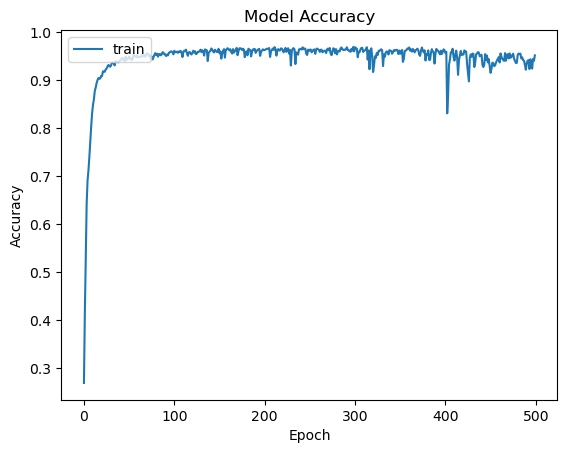

In [67]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(historyObject.history['accuracy'])
# plt.plot(historyObject.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

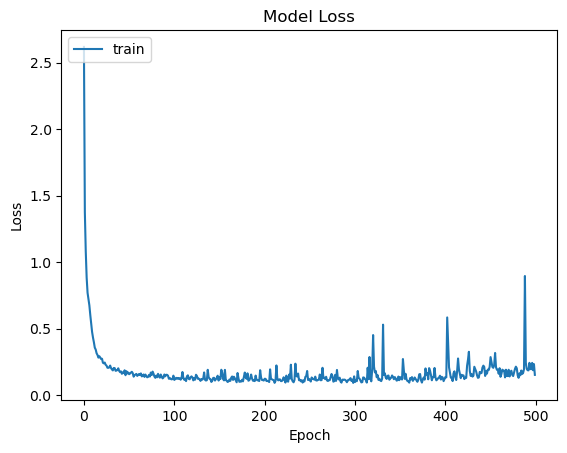

In [68]:
# summarize history for loss
plt.plot(historyObject.history['loss'])
# plt.plot(historyObject.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Load History Log Data If Needed

In [ ]:
import pandas as pd
log_data = pd.read_csv('ann_epoch_500_training.log', sep=',', engine='python')

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(log_data['accuracy'])
# plt.plot(historyObject.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(log_data['loss'])
# plt.plot(historyObject.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
y_pred_backup = y_pred
y_test_backup = y_test

In [81]:
print(historyObject.history)

{'loss': [3.3990631103515625, 1.502043604850769, 1.29777991771698, 1.1157479286193848, 0.9581391215324402, 0.8530059456825256, 0.8017531037330627, 0.7591179609298706, 0.7330578565597534, 0.6896420121192932, 0.6568135023117065, 0.6324910521507263, 0.5876391530036926, 0.5431166291236877, 0.5003068447113037, 0.5106831789016724, 0.4937537908554077, 0.44352683424949646, 0.36862504482269287, 0.33585023880004883], 'accuracy': [0.22525286674499512, 0.34714171290397644, 0.4192521870136261, 0.5201727747917175, 0.6071712970733643, 0.6530287265777588, 0.6691669225692749, 0.6875213384628296, 0.6921241283416748, 0.712069571018219, 0.7280941009521484, 0.739345371723175, 0.7596317529678345, 0.7916808724403381, 0.810035228729248, 0.8217411041259766, 0.8204909563064575, 0.8475963473320007, 0.8677690625190735, 0.8804978132247925]}


In [57]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_pred,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
1.00


In [58]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
1.00


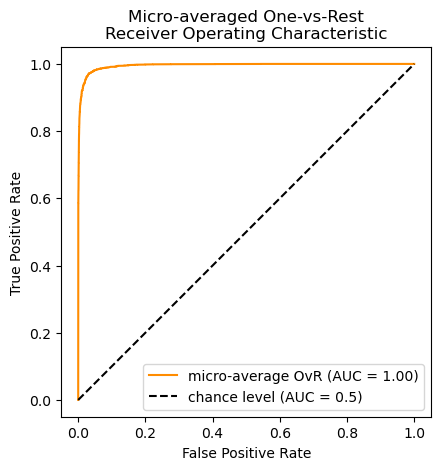

In [59]:
RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [60]:
n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.99


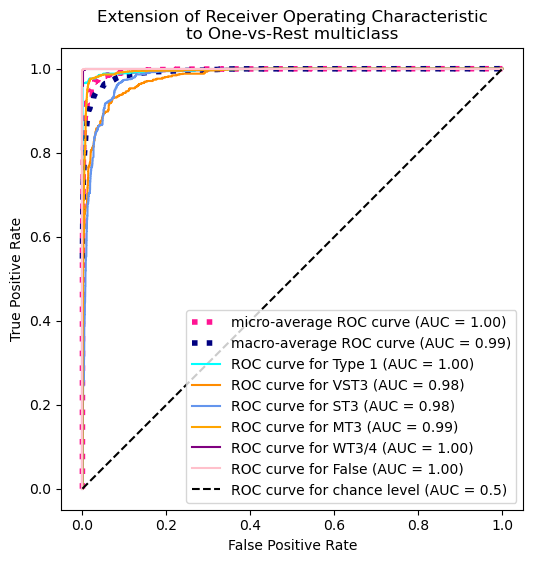

In [61]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#one-vs-rest-multiclass-roc

from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "orange", "purple", "pink"])
target_names = ['Type 1', 'VST3', 'ST3', 'MT3', 'WT3/4', 'False']

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [85]:
print(historyObject.history.keys()) # model.fit returns 'History' object. We can access its 'history' attribute.

dict_keys(['loss', 'accuracy'])


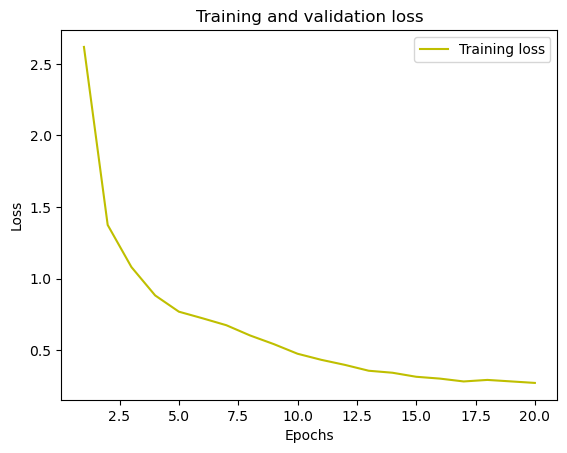

In [69]:
# We can plot the training and validation accuracies at each epoch by using the history variable returned by the fit function.
import matplotlib.pyplot as plt

loss = historyObject.history['loss']
# val_loss = siamese_net.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

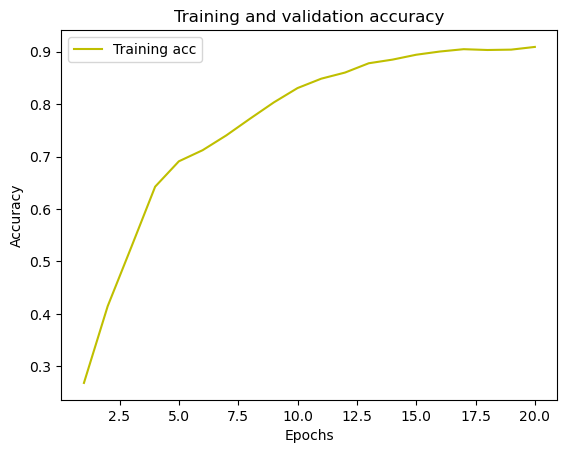

In [70]:
acc = historyObject.history['accuracy']
# val_acc = siamese_net.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# # Train-Test Method Ends!